# Experiment 6

# New scenario: Suikawari
https://en.wikipedia.org/wiki/Suikawari  

I made a new scenario 'suikawari' and checked its behavior.  
I also changed the scenario and checked how the agents changed their behavior.

## Rule (default: exp6.1)
There are two kinds of agents (speaker and splitter) and one goal (watermelon).  
Only the speaker knows the watermelon position so that he leads the splitter to  
the watermelon by his voice.  
The splitter is blind and can hear only the speaker's voice.

- speaker
    - observation: the direction to the watermelon from the splitter
    - action: voice (5 dim)
    - rew: -1 * distance between splitter and watermelon
- splitter
    - observation: speaker's voice
    - action: move (adding splitter's velocity)
    - rew: same as speaker


## Summary (see below for details)
### exp6-1  
The defulat scenario. The agents properly learn how to move and speak.  
As expected, each speaker's voice leads the corresponding splitter's action.  
For example, when the speaker says "A", the splitter moves to the right.

I also tried "DDPG" instead of "MADDPG" and found that the agents don't properly learn.  
"MADDPG" is an appropriate method for this scenario.

### exp6-2
The splitter's velocity is added to the input. The results are better than exp6-1.  
This is because the splitter can "stop" using its velocity information. Acutually,  
one of the speaker's voice (= "A" in this case) means "stay". Note that "stay" action   
didn't exist in exp6-1.

### exp6-3
The number of the splitter is two (exp6-1/6-2 is one). Unlike exp6-1 or exp6-2, this scenario  
is difficult for human. The results show that the agents properly learn. The speaker's voice   
is differently intepreted for the two splitters: "B" measn "go up" for agent1 but "go right" for agent2.  
Using this trick, the agents smoothly reach to the watermelon.  
This is a good example that the machine is good at planning complex tasks like this scenario.

### exp6-4
exp6-4-1 and exp6-4-2 are almost the same as exp6-1 and exp6-2 respectively.  
The difference is that speaker of exp6-2 scenarios use "word" (e.g., "CAA") intead of  
one character (e.g., "A"). The speaker takes its previous "word" and decides the next action  
(= speak one character). The splitter also takes "word" as an input.

As expected, the results of exp6-4-1 and exp6-4-2 are almost the same as those of  
exp6-1 and exp6-2 respectively. It can be intepreted that the speaker makes "word" to convey  
the information (in a sense). 

## Exp directories
### exp6-1: suikawari1 (only position info)
- 6-1-1 (default; maddpg)
    - suikawari1__2018-04-06_18-32-49
- 6-1-2 (ddpg)
    - suikawari1__2018-04-06_18-32-51

### exp6-2: suikawari2 (add velocity info)
- exp 6-1-1 (maddpg)
    - suikawari2__2018-04-06_18-32-53
- exp 6-1-2 (ddpg)
    - suikawari2__2018-04-06_18-32-56
    
### exp6-3: suikawari3 (two splitters)
- exp 6-3
    - suikawari3__2018-04-04_13-46-22
    
### exp6-4: suikawari4, suikawari5 (speake's voice is a word)
- exp6-4-1
    - suikawari4__2018-04-05_12-07-13
- exp6-4-2
    - suikawari5__2018-04-05_13-50-01

## Note
The movable agent's action is "adding its velociy".  
The agent can take five actions (four direction + one neutral):
- 1: right
- 2: left
- 3: up
- 4: down
- 0: neutral


In [1]:
%matplotlib inline
import os
import os.path as osp
import re
import glob
from IPython.display import HTML
from IPython.display import display
plt.rcParams["font.size"] = 16

exp_dir = '../exp_results/exp6_180331'
par_dir = '../params/'

def play_linked_video(each_exp_dir, fn_video, width=500, height=300):
    fn_video = _get_linked_video(each_exp_dir, fn_video)
    return _play_video(fn_video, width, height)

def _get_linked_video(each_exp_dir, fn_video):
    link_dir = osp.join('./videos', osp.basename(each_exp_dir))
    if osp.lexists(link_dir):
        os.remove(link_dir)
    os.symlink(osp.abspath(each_exp_dir), link_dir)
    fn_video = osp.join(link_dir, 'videos/%s' % fn_video)
    return fn_video

def _play_video(fn_video, width=500, height=300):
    print(fn_video)
    return HTML("""
    <video width="%d" height="%d" controls>
      <source src="%s" type="video/mp4">
    </video>""" % (width, height, fn_video))

def get_exp_dir(exp_dir, scenario):
    for fn in glob.glob(osp.join(exp_dir, '*')):
        if re.search(scenario + '__', fn):
            return fn

def get_scenario_df(exp_dir, scenario, fn_rewards):
    each_exp_dir = get_exp_dir(exp_dir, scenario)
    fn_lc = osp.join(each_exp_dir, 'learning_curves', fn_rewards)
    df_lc = pd.read_csv(fn_lc, index_col=False)
    return df_lc
    
def plot_each_lc(scenario):
    fn_lcs = ['rewards.csv', 'agents_rewards.csv']
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    for i, fn_rew in enumerate(fn_lcs):
        df_lc = get_scenario_df(exp_dir, scenario, fn_rew)
        df_lc.plot(x='step', style='-o', fontsize=16, ax=axes[i], title=scenario, alpha=0.5)

def plot_each_lc2(each_exp_dir):
    fn_lcs = ['rewards.csv', 'rewards.csv', 'agents_rewards.csv']
    
    fig, axes = plt.subplots(1, 3, figsize=(21, 5))
    for i, fn_rew in enumerate(fn_lcs):
        fn_lc = osp.join(each_exp_dir, 'learning_curves', fn_rew)
        df_lc = pd.read_csv(fn_lc, index_col=False)
        df_lc.columns = [coln.strip() for coln in df_lc.columns]
        if i == 0:
            df_lc['step_per_epi'] = df_lc[['step']].diff().values / df_lc[['episode']].diff().values
            df_lc.plot(x='episode', y='step_per_epi', style='-o', fontsize=12, 
                               ax=axes[i], title=osp.basename(each_exp_dir), alpha=0.5)
        else:
            del df_lc['step']
            df_lc.plot(x='episode', style='-o', fontsize=12, ax=axes[i], title=osp.basename(each_exp_dir), alpha=0.5)
    #     break

def action_space(scenario):
    from multiagent.environment import MultiAgentEnv
    import multiagent.scenarios as scenarios
    fn = osp.join('../../../multiagent-particle-envs/multiagent/scenarios/%s.py' % scenario)
    scenario = scenarios.load(fn).Scenario()
    world = scenario.make_world()
    env = MultiAgentEnv(world, scenario.reset_world, scenario.reward, scenario.observation)
    print(env.action_space)

In [2]:
def _make_dic():
    import string
    abc = string.ascii_uppercase
    if False:
        dic = dict(zip(abc, range(1, len(abc)+1)))
        dic['_'] = 0
    else:
        dic = dict(zip(abc, range(0, len(abc))))
    return dic

def to_case_val(case):
    dic = _make_dic()
    return dic[case]

def to_val_case(val):
    dic = _make_dic()
    dic_rev = dict([(v, k) for k, v in dic.items()])
    return dic_rev[val]

def get_df_messages2(fn_video):
    fn_message = fn_video.replace('.mp4', '_messages.csv')
    df_msg = pd.read_csv(fn_message)
    for coln in df_msg.columns[:-2]:
        if np.all(df_msg[coln] == '_'):
            del df_msg[coln]
        else:
            df_msg[coln] = df_msg[coln].apply(to_case_val)
    return df_msg

def plot_messages2(fn_video):
    df_msg = get_df_messages2(fn_video)
    each_epis = sorted(df_msg.episode.unique())
    fig, axes = plt.subplots(1, len(each_epis), figsize=(7*len(each_epis), 5), sharey=True)

    yticks = range(int(df_msg.iloc[:, :-2].values.max()) + 1)
    for i, i_epi in enumerate(each_epis):
        ax = axes[i]
        df_msg.loc[df_msg.episode==i_epi, df_msg.columns != 'episode']\
            .plot(x='step', style='-o', ax=ax,
                     alpha=0.5, title='i_epi=%d' % i_epi)
        ax.set_yticks(yticks)
        ax.set_yticklabels([to_val_case(v) for v in yticks])
    plt.subplots_adjust(wspace=0.05, hspace=0)

In [3]:
def plot_actions(epi, fn_video_template, n_episdoes=3, n_agents=2, n_dim_c=5):
    n_each_step = 50
    N_ACT = 5
    colns_n = [['act%d' % i for i in range(n_dim_c)], ['act%d' % i for i in range(N_ACT)]]
    dic_acts = [dict(zip(colns, list(range(len(colns))))) for colns in colns_n]
    ylabels = ["speaker's voice", 'action']
    colors = ['grey', 'salmon', 'steelblue']
    
    fn_video = _get_linked_video(each_exp_dir, fn_video_template.format(epi))
    dfs = []
    for i in range(n_agents):
        fn_csv = fn_video.replace('.mp4', '_actions_agent%d.csv' % i)
        dfs.append(pd.read_csv(fn_csv))

    fig, axes = plt.subplots(2, 1, figsize=(28, 8), sharex=True)
    plt.subplots_adjust(hspace=0)
    epis = [i+1 for i in range(n_episdoes)]
    for i, df in enumerate(dfs):
        color = colors[i]
        i = min(i, 1)
        ax, ylabel = axes[i], ylabels[i]
        df.loc[df.episode.isin(epis), colns_n[i]].rename(columns=dic_acts[i]).idxmax(axis=1).plot(style='-o', ax=ax, color=color)
        ax.set_ylabel(ylabels[i])
        if i == 0:
            yticks = list(range(n_dim_c))
            ax.set_yticks(yticks)
            ax.set_yticklabels([to_val_case(v) for v in yticks])
        else:
            yticks = list(range(5))
            dic_action = {0: 'n', 1: 'r', 2: 'l', 3: 'u', 4: 'd'}
            ax.set_yticks(yticks)
            ax.set_yticklabels([dic_action[v] for v in yticks])
        for i in range(n_episdoes):
            end_epi = (i + 1) * n_each_step - 1
            ax.axvline(end_epi, color='orange', ls='--')


## exp 6-1
This is a default scenario. The rule is explained in the first cell (see above).

### exp6-1-1 (default)
#### Results
As expected, **the splitter learns how to move by speaker's voice**.  
Actually, I found the following releation (Speaker's voice (char) and the meaning):
- A: go right
- B: go down
- C: go up ? (not used much)
- D: go left
- E: go up  

#### Discussion
After reaching the watermelon, the speaker says A and D, which leads the splitter  
to go back and forth around the goal. But the splitter doesn't stop on the watermelon  
(the highest reward). This is because both agents don't know the splitter's velociy   
so that they cannot know which action will stop him.   

I expected that the speaker says "stay" when the splitter is around the watermelon  
(that's why the speaker has five kinds of voice). But the speaker didn't learn it,   
probably because the agents don't know the velocity (as discussed above).

### exp6-1-2 (DDPG)
In exp6-1-1, MADDPG is used. In this case, the splitter's Q funcion is trained  
using the speaker's observation, where the direction to the watermelon is known.  
This makes the agents learn easily (3000~5000 episodes are enough to learn).  

In this experiment, we use DDPG instead of MADDPG.  
The splitter cannot get the goal info even during the training.

#### Results
The agents are unlearned. Actually they don't do anything at epi=100,000.  

#### Discussion
In this sceario, **MADDPG is a very efficient way to train**. Given that the goal position  
is known for all the agents during the training, the training is kind of "surpervised learning",   
which bridges the speaker'voice and splitter's intepretation efficiently.


## 6-1-1 (default)

None

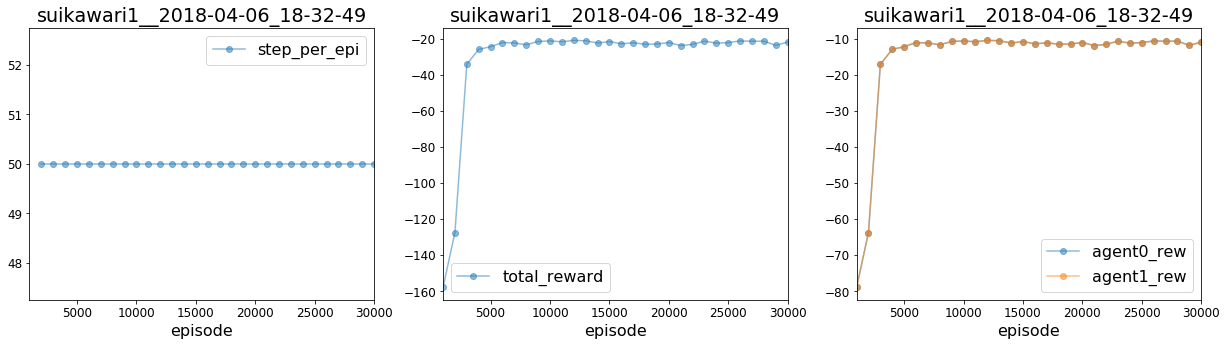

./videos/suikawari1__2018-04-06_18-32-49/videos/video-10000.mp4


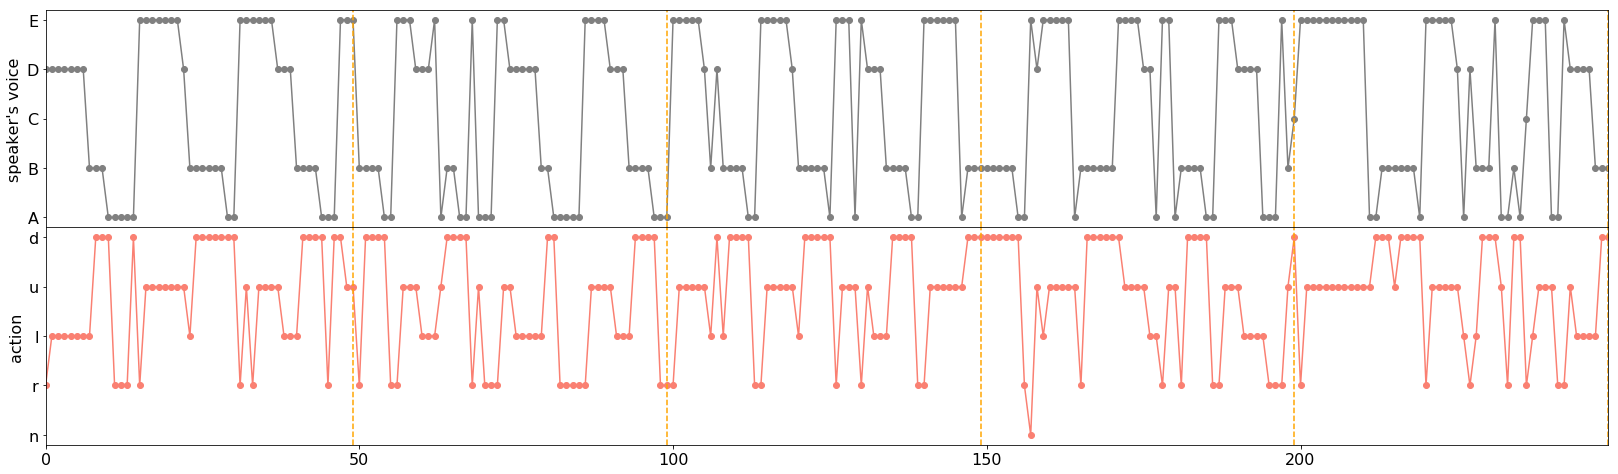

./videos/suikawari1__2018-04-06_18-32-49/videos/video-30000.mp4


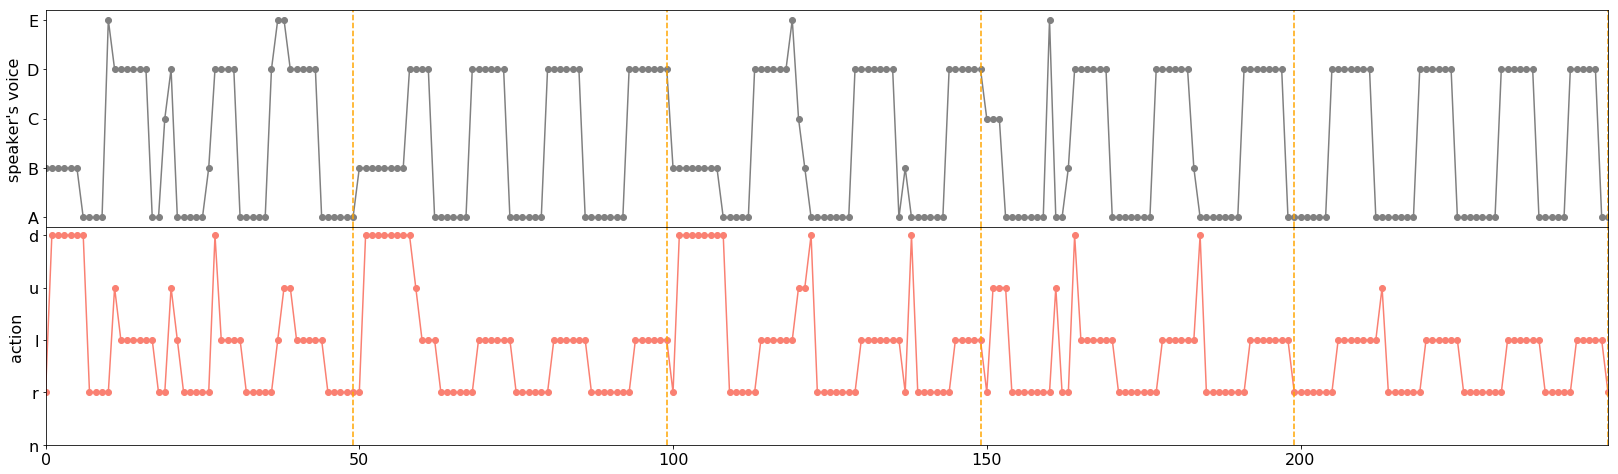

In [4]:
# 1st row: max_epi_len history + learning curve
# 2nd: row: video
# 3rd row: speaker's voice (5 char) + the corresponding action of the splitter
each_exp_dir= 'suikawari1__2018-04-06_18-32-49'
fn_video_template = 'video-{}.mp4'
epis = [10000, 30000]

each_exp_dir = osp.join(exp_dir, each_exp_dir)
display(plot_each_lc2(each_exp_dir))
plt.show()

for epi in epis:
    fn_video = fn_video_template.format(epi)
    display(play_linked_video(each_exp_dir, fn_video))
    plot_actions(epi, fn_video_template, n_episdoes=5)
    plt.show()

## 6-1-2 (MADDPG -> DDPG)

None

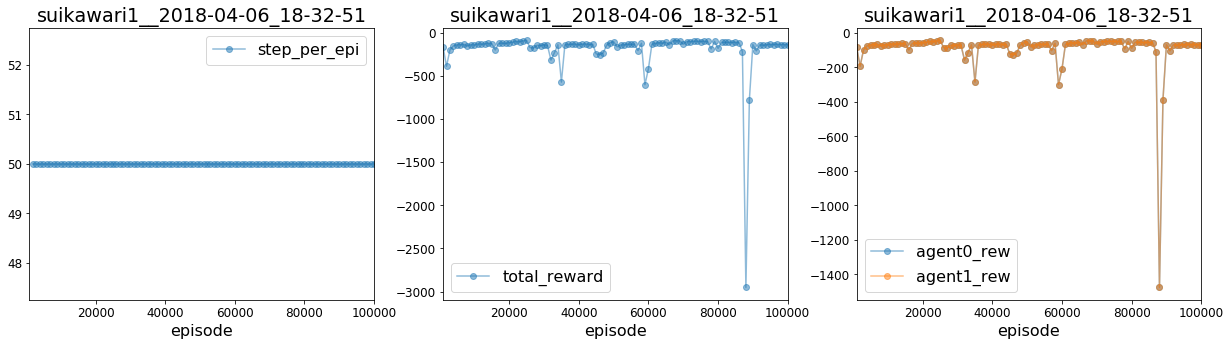

./videos/suikawari1__2018-04-06_18-32-51/videos/video-30000.mp4


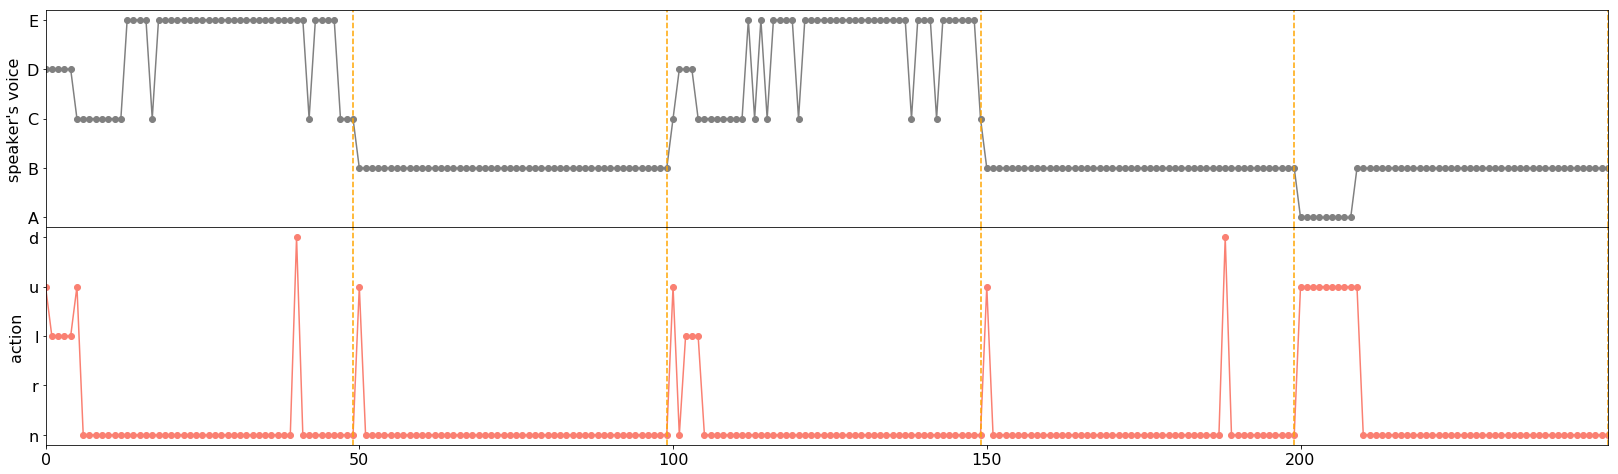


./videos/suikawari1__2018-04-06_18-32-51/videos/video-100000.mp4


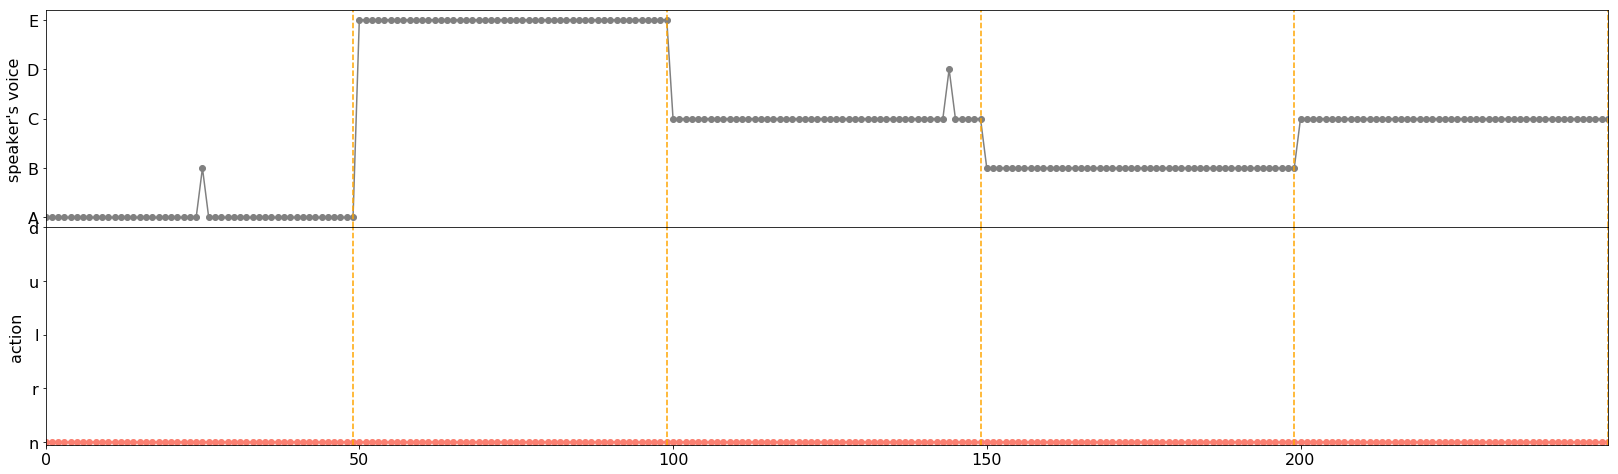

In [5]:
# 1st row: max_epi_len history + learning curve
# 2nd: row: video
# 3rd row: speaker's voice (5 char) + the corresponding action of the splitter

each_exp_dir= 'suikawari1__2018-04-06_18-32-51'
fn_video_template = 'video-{}.mp4'
epis = [30000, 100000]

each_exp_dir = osp.join(exp_dir, each_exp_dir)
display(plot_each_lc2(each_exp_dir))
plt.show()

for epi in epis:
    fn_video = fn_video_template.format(epi)
    display(play_linked_video(each_exp_dir, fn_video))
    plot_actions(epi, fn_video_template, n_episdoes=5)
    plt.show()
    print('=' * 100 + '\n')

## exp 6-2 (suikawari2)

### Background
In exp6-1 discussion, I concluded that the unstable movement around the watemelon is probably  
becuase the agents cannot know how to stop.  
To help them, this exp tells the agnets splitter's velocity. I expect this will make the splitter stay around  
the watermelon efficiently.

### Rule
The rule is the same as exp6-1 except that the splitter's velocity is added to the agents' obvservation.

### exp 6-2-1 (MADDPG)
#### Results
The videos show that the agents learn more sophisticated behavior than exp6-1-1.  
I found the following realtioinship from the video.  
- A: stay (neutral)
- B: go up
- C: go left
- D: go down
- E: go right

#### Discussion
As expected, **the splitter now learns "stay"** around the watermelon, following the speaker's voice of "A".  
As you see, **the speaker keeps saying "A" after the splitter gets close to the watermelon**.  
This is different from exp6-1-1 where the agents don't know how to stop.

### exp 6-2-2 (DDPG)
#### Results & discussion
The learning results are worse than exp6-2-1 but much better than exp6-1-2.  
This suggests:
- **(vs exp6-1-2) The more information helps the agents to learn propoerly**,
- **(vs exp6-2-1) MADDPG is an efficient method for this scenario**.  

These are consistent with the conclusion of exp6-1.


## 6-2-1 (MADDPG)

None

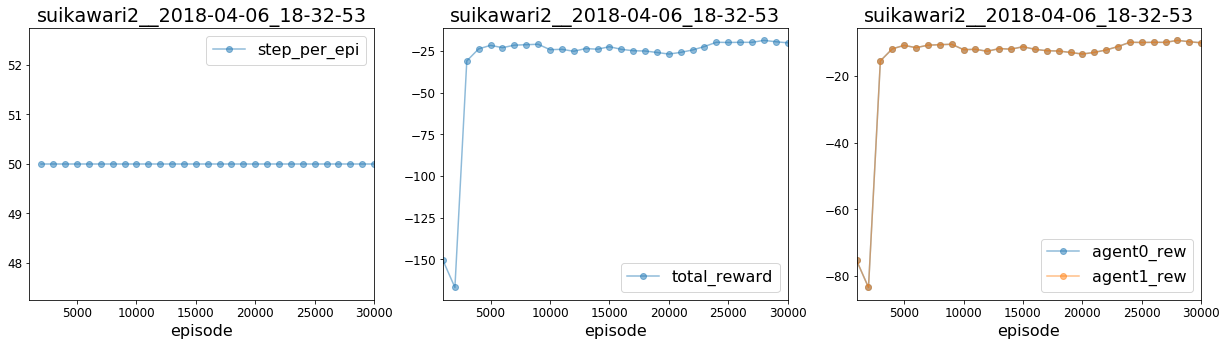

./videos/suikawari2__2018-04-06_18-32-53/videos/video-10000.mp4


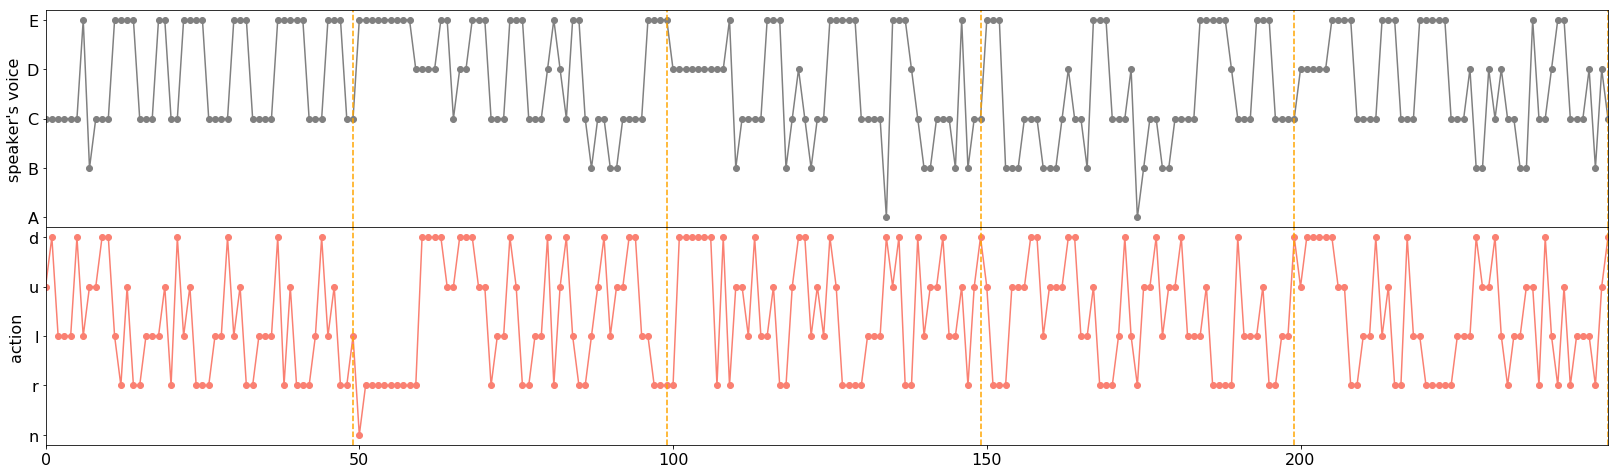

./videos/suikawari2__2018-04-06_18-32-53/videos/video-30000.mp4


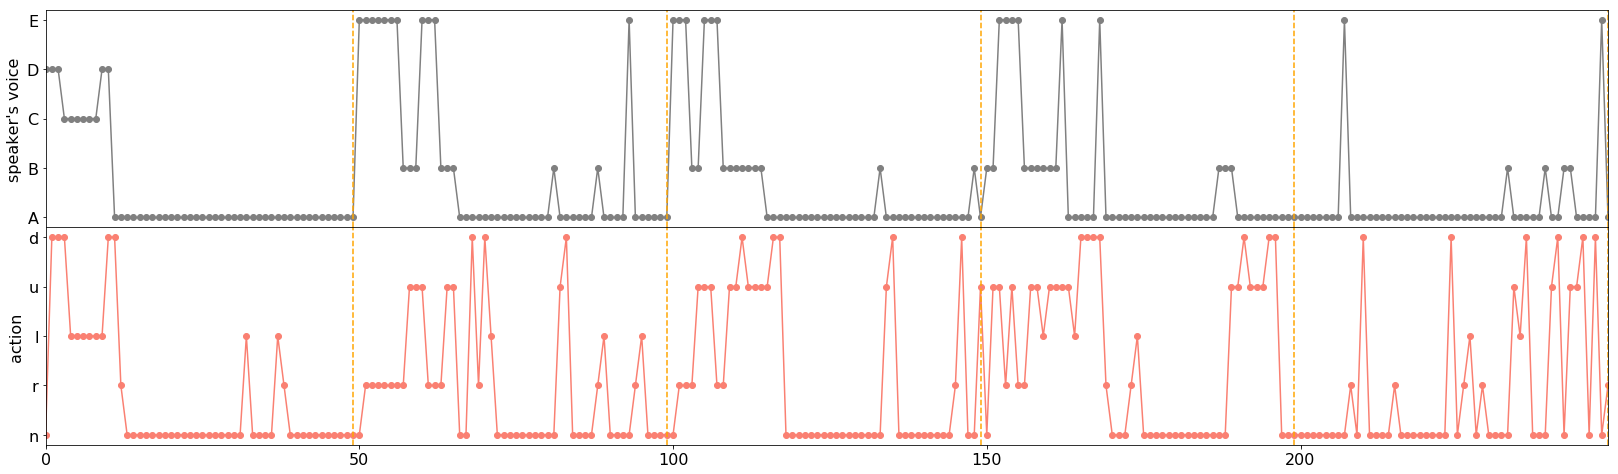

In [6]:
each_exp_dir= 'suikawari2__2018-04-06_18-32-53'
fn_video_template = 'video-{}.mp4'
epis = [10000, 30000]

each_exp_dir = osp.join(exp_dir, each_exp_dir)
display(plot_each_lc2(each_exp_dir))
plt.show()

for epi in epis:
    fn_video = fn_video_template.format(epi)
    display(play_linked_video(each_exp_dir, fn_video))
    plot_actions(epi, fn_video_template, 5)
    plt.show()

## 6-2-2 (MADDPG -> DDPG)

None

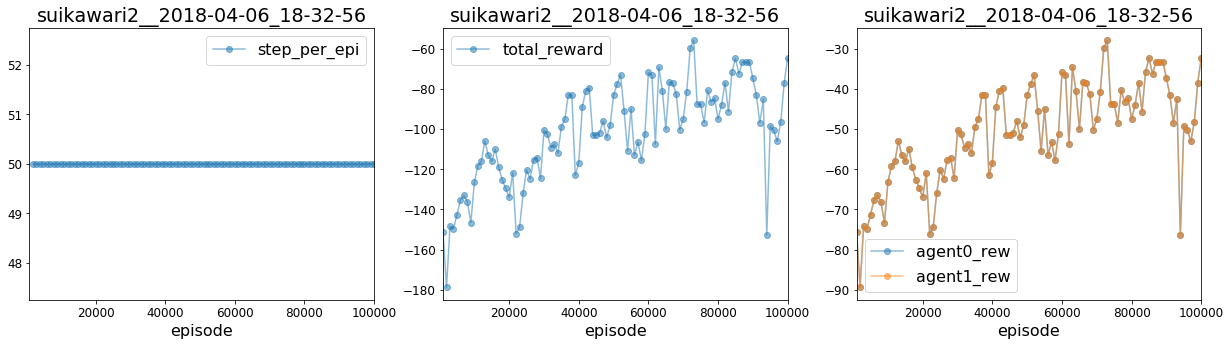

./videos/suikawari2__2018-04-06_18-32-56/videos/video-30000.mp4


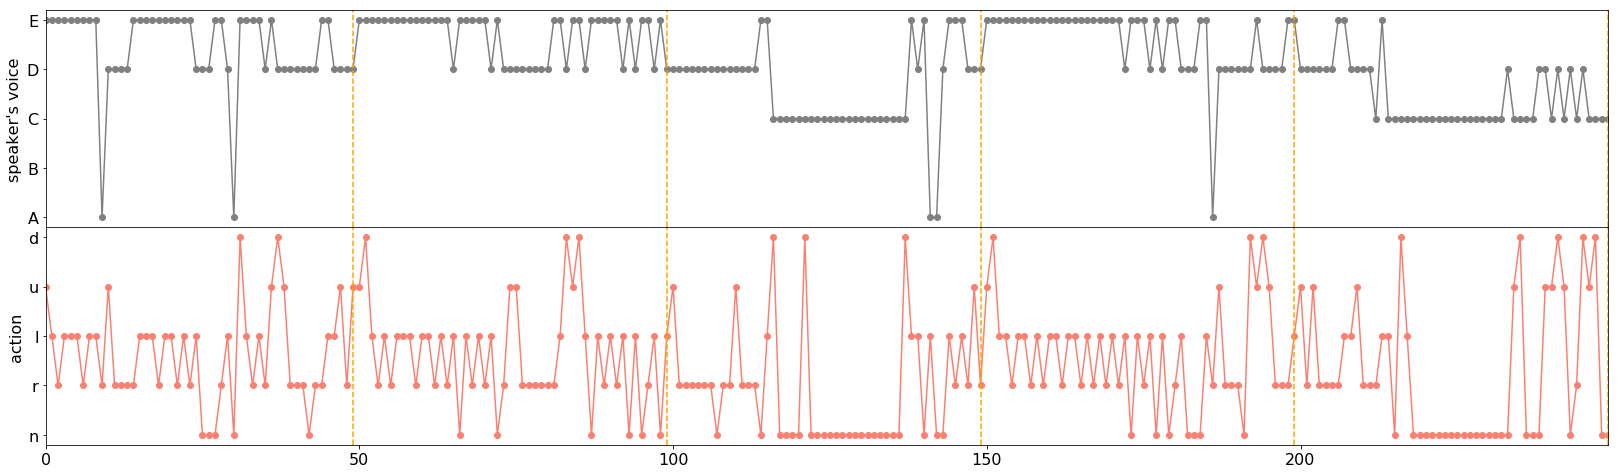

./videos/suikawari2__2018-04-06_18-32-56/videos/video-100000.mp4


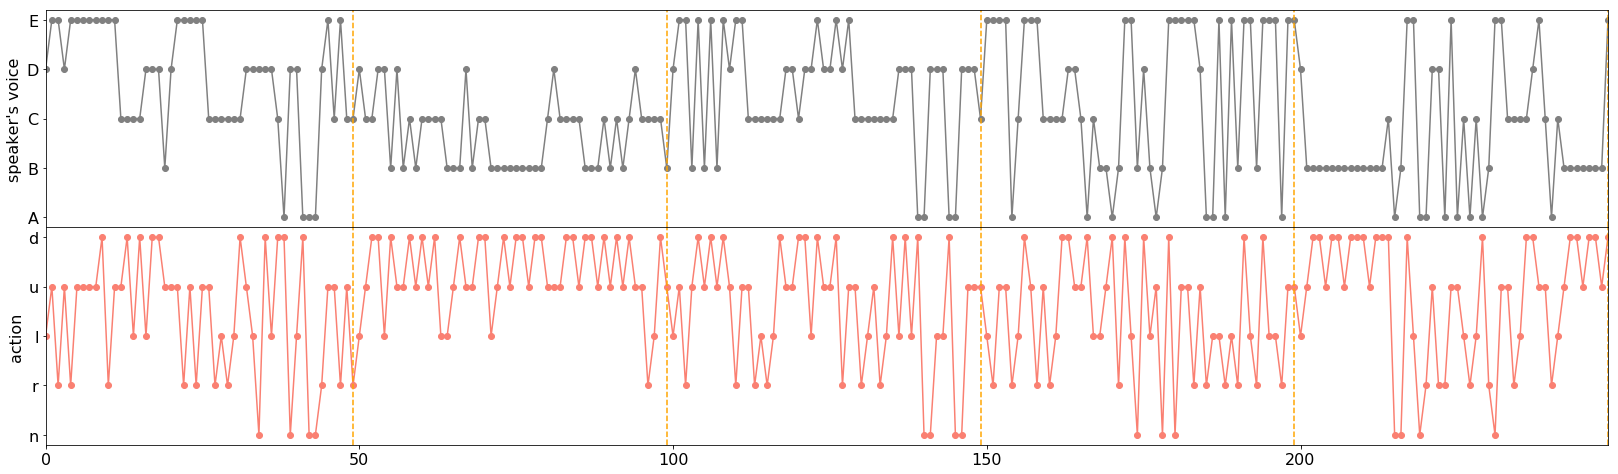

In [7]:
each_exp_dir= 'suikawari2__2018-04-06_18-32-56'
fn_video_template = 'video-{}.mp4'
epis = [30000, 100000]

each_exp_dir = osp.join(exp_dir, each_exp_dir)
display(plot_each_lc2(each_exp_dir))
plt.show()

for epi in epis:
    fn_video = fn_video_template.format(epi)
    display(play_linked_video(each_exp_dir, fn_video))
    plot_actions(epi, fn_video_template, 5)
    plt.show()

## exp 6-3 (suikawari3, suikawari4)

### exp 6-3 (suikawari3)
#### Rule
Almost same as exp 6-1.  
The differences are:
- the number of splitters is 2 (exp6-1 is 1)
- the speaker's char dimension is set at 6 (5 at exp6-1)
- In addiction to the goal position from each agent, the splitters' velocity is added to the speaker's obs.

#### Results
The agents properly + rapidly (~ 5000 epi) learn how to speak and move.  
The figure of the speaker's voice and the correspoinding action shows  
a clear relationship between the voice and the movement:
- **agent1 (red)**
    - A: go up
    - B: go down
    - C: go right
    - D: go left
    - E: go left
    - F: go right
- **agent2 (blue)**
    - A: unclear (random + neutral?)
    - B: go down
    - C: go up
    - D: go left
    - E: go up
    - F: go right


#### Discussion
The speaker's voice is diffrently interpreted by each agent (e.g., "C" means "go right" for agent1  
and "go up" for agent2). Using this trick, the speaker manages both agents to get close to the watermelon.  
I also found that there is no "stay" but there is a redundant order. For example, "C" and "F" mean "go up" and  
"go right" respectively for agent2; but both the voice mean "go right" for agent1.   
This is also helpful to make the splitters move differently.

I expected that this was a difficutl task (imagine if you speak to two persons at onece).  
But the results show that **this is an easy one for the machine**.  
This is excting!  
I can understand what happens in the model, but it is difficult to manually plan and execute this trick.  
**This scenario is a good exapmle that the machine could do better than human**.


## exp 6-3 (suikawari3)

None

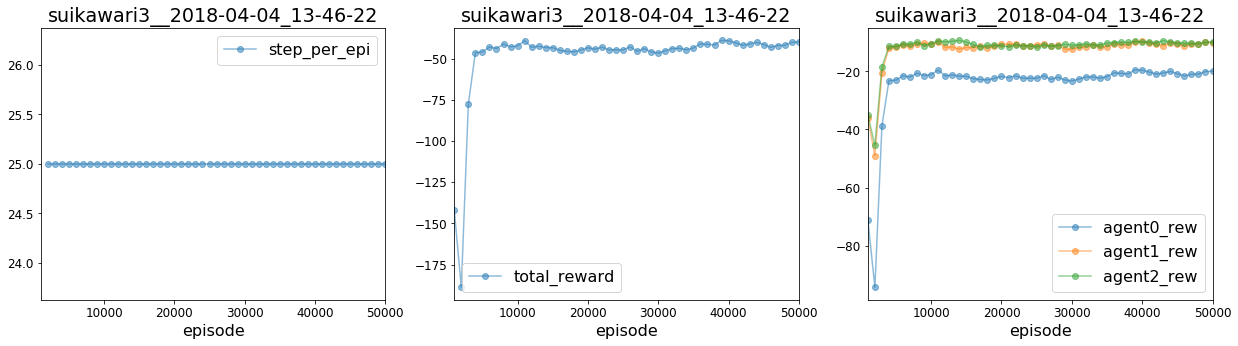

./videos/suikawari3__2018-04-04_13-46-22/videos/video-50000.mp4


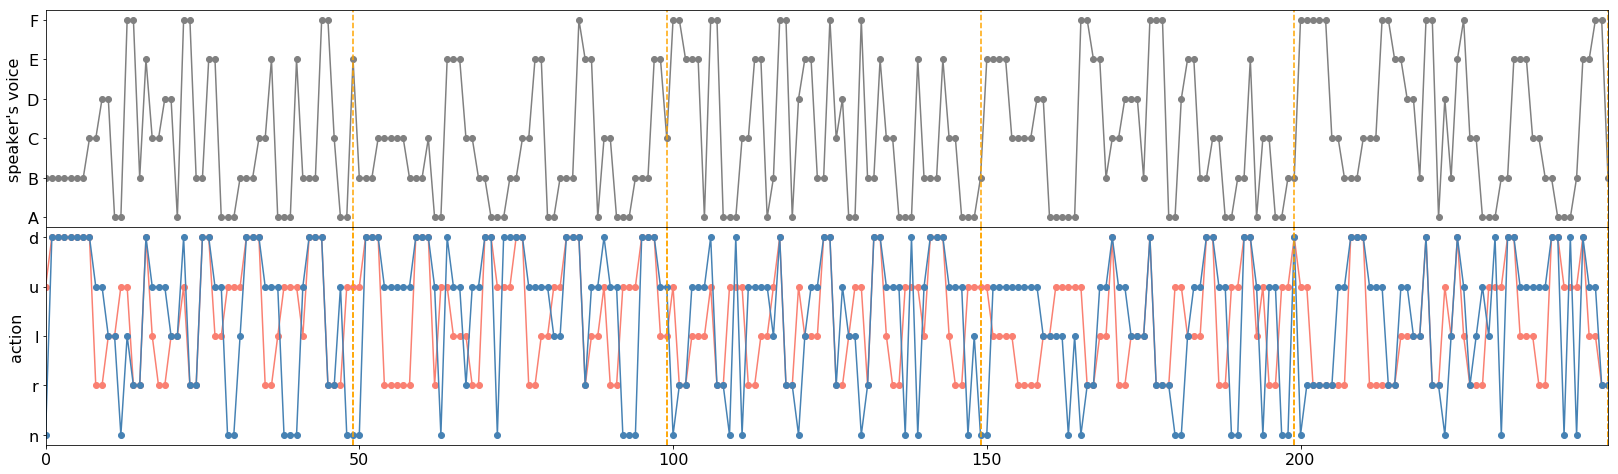

In [8]:
# 1st row: max_epi_len history + learning curve
# 2nd: row: video
# 3rd row: speaker's voice (6 char) + the corresponding action of the splitter (red=red agent, blue=blue agent)
each_exp_dir= 'suikawari3__2018-04-04_13-46-22'
fn_video_template = 'video-{}.mp4'
epis = [50000]

each_exp_dir = osp.join(exp_dir, each_exp_dir)
display(plot_each_lc2(each_exp_dir))
plt.show()

for epi in epis:
    fn_video = fn_video_template.format(epi)
    display(play_linked_video(each_exp_dir, fn_video))
    plot_actions(epi, fn_video_template, n_episdoes=5, n_agents=3, n_dim_c=6)
    plt.show()

## exp6-4
### Background
So far, I have used the speaker voice of the previous step as the splitter's input.  
This means that speaker can convey only "one character" information.

If I add the speaker voice at the multiple previous steps, what will happen?   
I expect that the agents somehow learn "word" (= chunk of characters)  
to convey the information!

### exp6-4-1 (suikawari4)
#### Rule
Same as exp6-1-1 except that
- word_length = 3 (that of exp6-1-1 is 1)
    - word_length=3 means that agents' obs take the previous and the two more previous speaker's voice.
    - For example, when speaker's voice hisotry is "CAACCB", word_length=3 and 5 means "CCB" and "AACCB" respectively.
- dim_char = 3 (that of exp6-1-1 is 5: A, B, C, D, E)
    - dim_char: dimension of the speakers's voice
    - When dim_char is 5, word_length=1 can convey enough information.
    - Reducing dim_char would force the agents to use the multiple previous-step chars.
- speaker's input also takes the speaker's previous steps.

#### Results
The videos show that the agents properly lean how to move.  
"Splitter's action and the corresponding speaker's word" shows that each splitter's action has   
the corresponding the speaker's "words".  Actually when the noise (count <= 5) is removed,  
each "word" leads one action (except 'ACC').

#### Discussion
Given that the splitter's action is only 5, the word pattern of 3 dim ^ 3 = 27 is large enough to express the action.  
Actually, the video shows that the learned behavior is smilar to that of exp6-1-1.  
This is expected because this exp. scenario is the same as exp6-1-1 except that speaker's voice is "word" instead of "char".  

Note that I use a simple MLP not LSTM for the model, which means that the splitter takes the input speaker's "word"  
as one vector. For example, "word=AAA" is inputted as a vector (1,0,0,1,0,0,1,0,0). This is almos the same as the case of "char".   
On the other hand, the spekaer determines the next voice using the previous "word". For example, if the previous word  
is "AAA", he take into account the word and determine the next voice B (the next "word" will be "AAB").  
It can be intepreted that **the speaker makes "word"** to convey the information (in a sense).  

The "word" is continuously used unlike natural language.  
For example, if the speaker's voice history is "ABACCA"  
- "word"s are "ABA", "BAC", "ACC" and then "CCA".
- (natural-language-like split): "ABA" and then "CCA".

The next "word" depends on the previous speaker's voice so that it is not simple to plan continuously speaking an appropriate "word".  
Fortunately the machine is good at making such a complex plan.


### exp6-4-2 (suikawari5)
#### Rule
Same as exp6-4-1 except that
- dim_char = 2 (that of exp6-4-1 is 3)
- In addiction to the goal position from each agent, the splitters' velocity is added to the speaker's obs.


#### Results
The videos show that the agents properly lean how to move.  
"Splitter's action and the corresponding speaker's word" shows that each splitter's action has   
the corresponding the speaker's "words".  

#### Discussion
The video shows that the learned behavior is better than that of exp6-4-1 and is smilar to that of exp6-2-1.   
This is consistent with the fact that this exp. scenario is the same as exp6-2-1 except that speaker's voice is  
"word" instead of "char".  This scenario shows that **dim_char=2 w/ word_len=3 is enough to convey the information**.  

Unlike exp6-1-1, some same "word" lead different movement. This is not suprising because this exp. takes  
the splitter's velocity (in addition to "word") as an input.


In [9]:
import collections
N_ACT = 5

def print_words(each_exp_dir, epi, fn_video_template, n_dim_c, len_memory=3, n_agents=2, lower_th=None):
    dic_acts = {0: 'neutral', 1: 'right', 2: 'left', 3: 'up', 4: 'down'}
    
    dfs = _get_dfs(each_exp_dir, epi, fn_video_template, n_dim_c, len_memory, n_agents)
    voice_counts = {}
    for i in range(N_ACT):
        y = dfs[1][dfs[1]['action'] == i]['voices'].values
        counts = collections.Counter(y)
        voice_counts[i] = counts
        print('%-10s: %s' % (dic_acts[i], counts))
        
    if lower_th is not None:
        print('\nLower threshold: %s' % lower_th)
        for i in range(N_ACT):
            print('%-10s: %s' %  (dic_acts[i], [k for k, v in voice_counts[i].items() if v >lower_th]))
    return voice_counts

    
def _get_dfs(each_exp_dir, epi, fn_video_template, n_dim_c=5, len_memory=3, n_agents=2):
    colns_act = [['act%d' % i for i in range(n_dim_c)],
                           ['act%d' % i for i in range(N_ACT)]]
    
    fn_video = _get_linked_video(each_exp_dir, fn_video_template.format(epi))
    dfs = []
    for i in range(n_agents):
        fn_csv = fn_video.replace('.mp4', '_actions_agent%d.csv' % i)
        df = pd.read_csv(fn_csv)
        df['action'] = df[colns_act[min(i, 1)]].idxmax(axis=1).apply(lambda x: int(x.strip('act')))
        dfs.append(df)

    init_value = 0  # initial voice value is 0 (= A)
    speaker_acts = [init_value] * len_memory + list(dfs[0]['action'].values)
    speaker_acts_mem = [''.join([to_val_case(v) for v in speaker_acts[i:i+len_memory]])
                                            for i in range(len(dfs[0]))]
    
    dfs[1]['voices'] = speaker_acts_mem
    init_voice = lambda voice, step, len_memory: to_val_case(init_value) * (len_memory - step) + voice[(len_memory - step):]
    for j in range(len_memory):
        dfs[1].loc[dfs[1]['step'] == j, 'voices'] =\
            [init_voice(voice, j, len_memory) for voice in dfs[1].loc[dfs[1]['step'] == j, 'voices'].values]

    return dfs


## exp6-4-1 (dim_char=3, word_length=3)

None

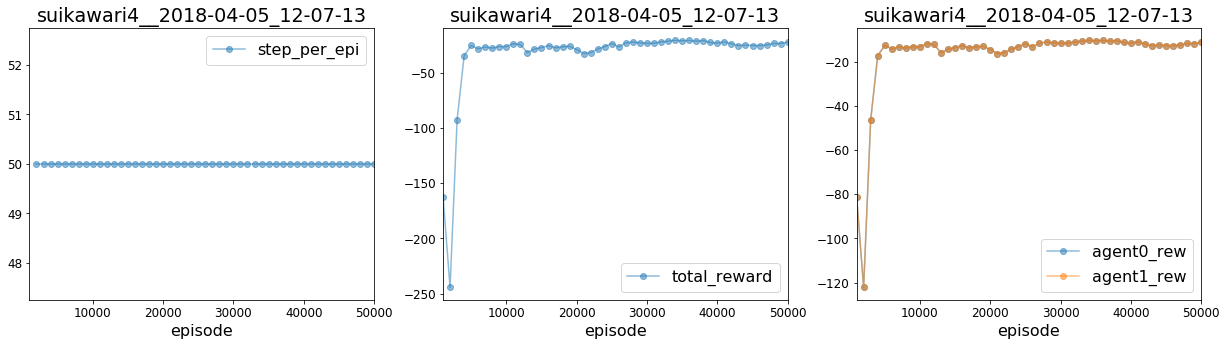

./videos/suikawari4__2018-04-05_12-07-13/videos/video-10000.mp4


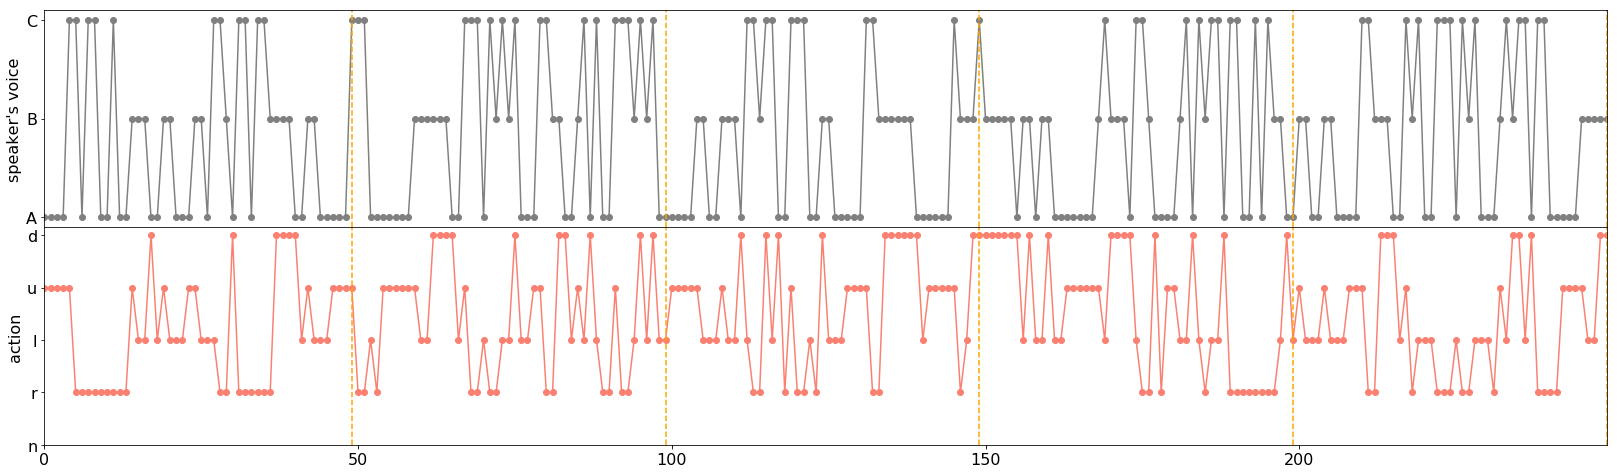

./videos/suikawari4__2018-04-05_12-07-13/videos/video-50000.mp4


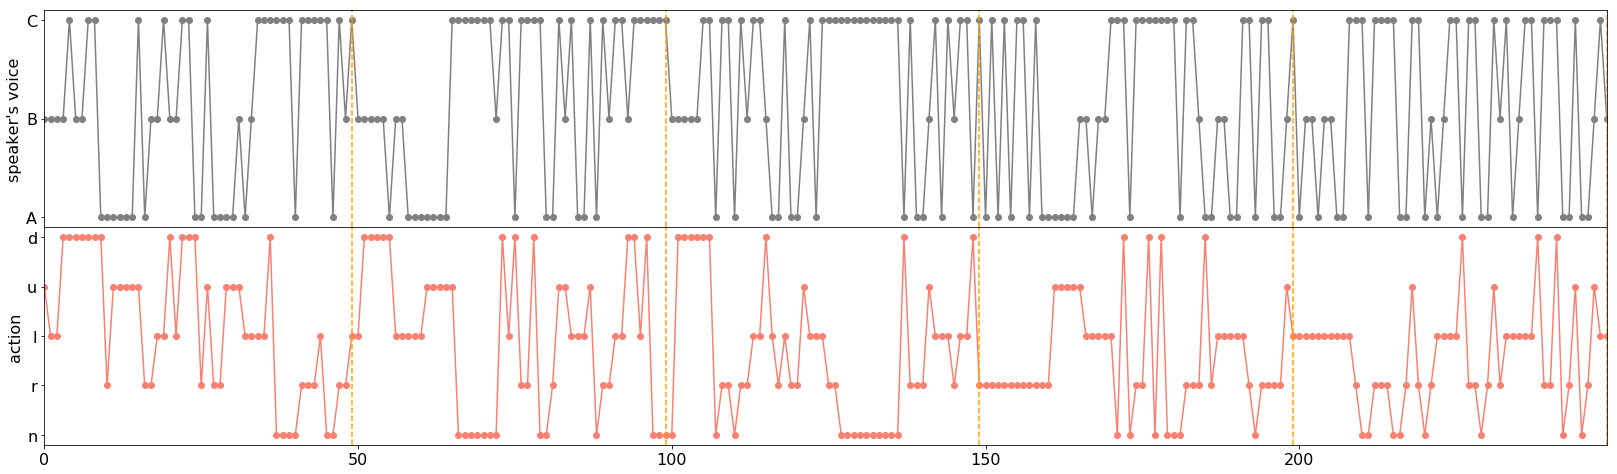

In [10]:
each_exp_dir= 'suikawari4__2018-04-05_12-07-13'
fn_video_template = 'video-{}.mp4'
epis = [10000, 50000]

each_exp_dir = osp.join(exp_dir, each_exp_dir)
display(plot_each_lc2(each_exp_dir))
plt.show()

for epi in epis:
    fn_video = fn_video_template.format(epi)
    display(play_linked_video(each_exp_dir, fn_video))
    plot_actions(epi, fn_video_template, n_episdoes=5, n_agents=2, n_dim_c=3)
    plt.show()

### Splitter's action and the corresponding speaker's 'word'

In [11]:
# first group
#   - splitter's action: speaker's word (= splitter's input)
#   - up : Counter({'AAA': 16, 'CAA': 13}) means that words of 29 splitter's action 'up' are composed of 16 'AAA' and  13 'CAA'.
# second group
#  - the frequent words for each action
#  - here we select the words whose count is > 5
n_dim_c = 3
len_memory = 3
lower_th = 5

epi = 50000
voice_counts = print_words(each_exp_dir, epi, fn_video_template, n_dim_c, len_memory, lower_th=lower_th)

neutral   : Counter({'CCC': 35, 'ACC': 6, 'AAC': 3, 'AAA': 1, 'BBC': 1, 'BCC': 1})
right     : Counter({'CCA': 22, 'CAC': 18, 'ACA': 9, 'AAC': 8, 'ACC': 6, 'CBA': 2, 'AAA': 2})
left      : Counter({'AAB': 9, 'ABB': 8, 'CBC': 7, 'ABC': 6, 'BBA': 6, 'ACB': 6, 'BAB': 5, 'BAA': 5, 'BCA': 4, 'AAA': 3, 'CAB': 3, 'ABA': 2, 'BCB': 1, 'CCC': 1, 'CCB': 1})
up        : Counter({'AAA': 16, 'CAA': 13, 'AAC': 1})
down      : Counter({'BCC': 11, 'BBB': 8, 'BBC': 5, 'ACC': 3, 'CCB': 3, 'CBB': 2, 'ABB': 2, 'AAB': 2, 'CCC': 2, 'BCB': 1})

Lower threshold: 5
neutral   : ['ACC', 'CCC']
right     : ['ACC', 'ACA', 'AAC', 'CAC', 'CCA']
left      : ['ABB', 'ABC', 'AAB', 'CBC', 'BBA', 'ACB']
up        : ['CAA', 'AAA']
down      : ['BBB', 'BCC']


## exp6-4-2 (dim_char=2, word_length=3)

None

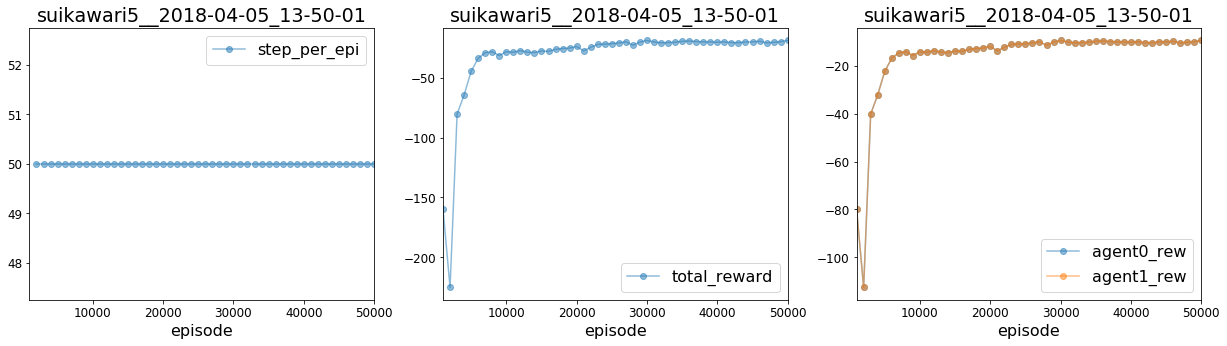

./videos/suikawari5__2018-04-05_13-50-01/videos/video-10000.mp4


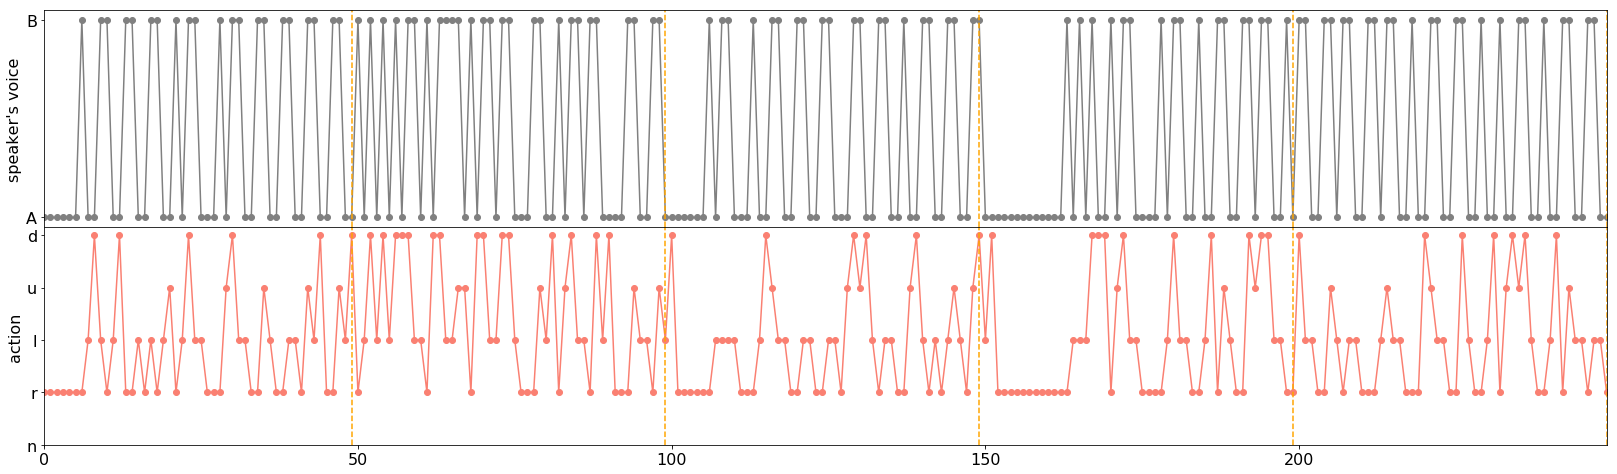

./videos/suikawari5__2018-04-05_13-50-01/videos/video-50000.mp4


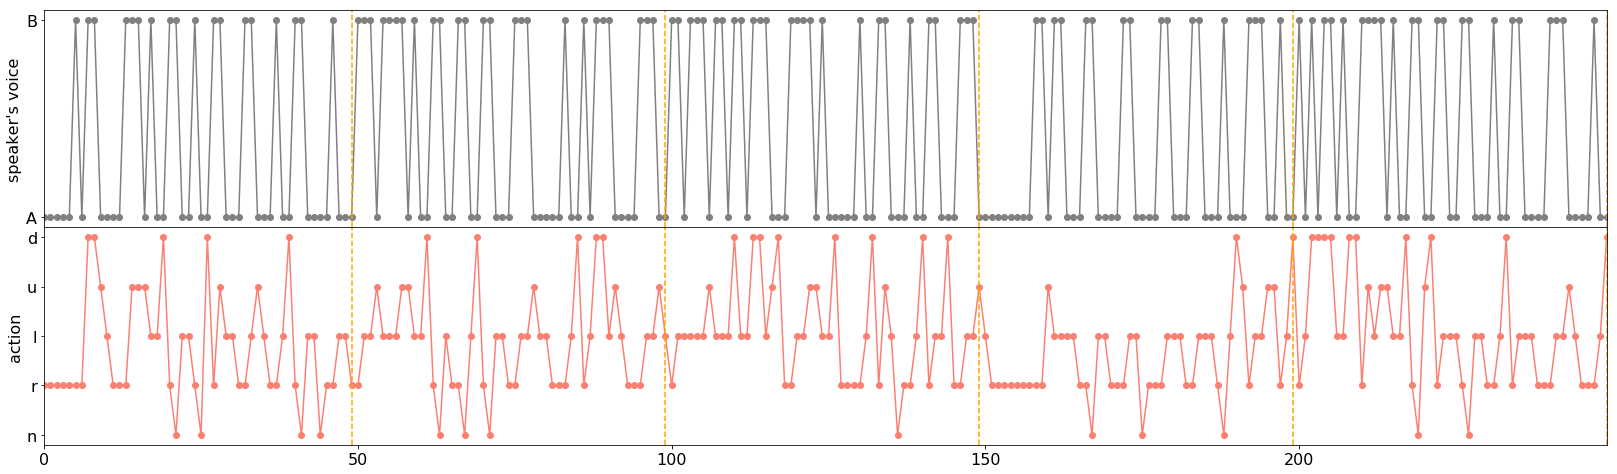

In [12]:
each_exp_dir= 'suikawari5__2018-04-05_13-50-01'
fn_video_template = 'video-{}.mp4'
epis = [10000, 50000]

each_exp_dir = osp.join(exp_dir, each_exp_dir)
display(plot_each_lc2(each_exp_dir))
plt.show()

for epi in epis:
    fn_video = fn_video_template.format(epi)
    display(play_linked_video(each_exp_dir, fn_video))
    plot_actions(epi, fn_video_template, n_episdoes=5, n_agents=2, n_dim_c=2)
    plt.show()

### Splitter's action and the corresponding speaker's 'word'

In [13]:
# first group
#   - splitter's action: speaker's word (= splitter's input)
#   - up : Counter({'AAA': 16, 'CAA': 13}) means that words of 29 splitter's action 'up' are composed of 16 'AAA' and  13 'CAA'.
# second group
#  - the frequent words for each action
#  - here we select the words whose count is > 5
n_dim_c = 2
len_memory = 3
lower_th = 5

epi = 50000
voice_counts = print_words(each_exp_dir, epi, fn_video_template, n_dim_c, len_memory, lower_th=lower_th)

neutral   : Counter({'AAB': 9, 'BBA': 2, 'BAA': 1, 'AAA': 1})
right     : Counter({'AAA': 47, 'BAA': 34, 'AAB': 2, 'BBA': 1})
left      : Counter({'ABB': 32, 'AAB': 26, 'BBA': 26, 'BAB': 9, 'ABA': 1, 'AAA': 1, 'BAA': 1})
up        : Counter({'BBB': 16, 'ABB': 5, 'AAB': 4, 'BAA': 1, 'BBA': 1})
down      : Counter({'ABA': 18, 'BAB': 6, 'BBA': 6})

Lower threshold: 5
neutral   : ['AAB']
right     : ['BAA', 'AAA']
left      : ['ABB', 'AAB', 'BBA', 'BAB']
up        : ['BBB']
down      : ['ABA', 'BAB', 'BBA']
